# Assignment - ICP5


## Q1. Titanic

In [147]:
# importing datasets and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('./train.csv')
test = pd.read_csv('./train.csv')
full_dataset = [train, test]

In [148]:
# Checking for nulls in table accoring to column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1. Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class.

In [149]:
# replace the male and female string to numbers to make it able to correlate
train_s = train.replace({'Sex':{'male':1,'female':0}})
train_s['Survived'].corr(train_s['Sex'])

-0.5433513806577555

### 1a. Do you think we should keep this feature?
  Answer: Yes. -0.54 is moderate negative relationship which means sex quite matters for survival.

### 2. Do at least two visulaizations to desribe or show correlations.

Total survivers: 342, female: 233, male: 109
Total not survivers: 549, female: 468, male: 81


,female,male
Survived,233,109
Not Survived,81,468


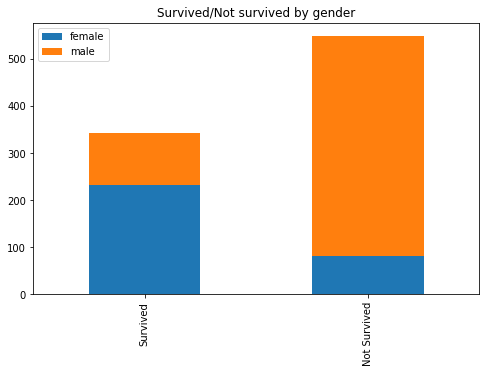

In [150]:
# Counting the survived according to gender and storing 
# the value in their respective variable
survived = train[train['Survived']==1]['Sex'].value_counts()
not_survived = train[train['Survived']==0]['Sex'].value_counts()

# Making a dataframe with below variables
df_sur = pd.DataFrame([survived, not_survived])
# Making their index
df_sur.index = ['Survived', 'Not Survived']
# Making a bar graph based on Survived and not survived by gender
df_sur.plot(kind='bar', stacked=True, figsize=(8, 5),title="Survived/Not survived by gender")
print("Total survivers: {0}, female: {1}, male: {2}".format(survived.sum(), survived[0], survived[1]))
print("Total not survivers: {0}, female: {1}, male: {2}".format(not_survived.sum(), not_survived[0], not_survived[1]))
display(df_sur)

Total survivers: 342, first: 136, second: 87, third: 119
Total survivers: 549, first: 80, second: 97, third: 372


,1,2,3
Survived,136,87,119
Not Survived,80,97,372


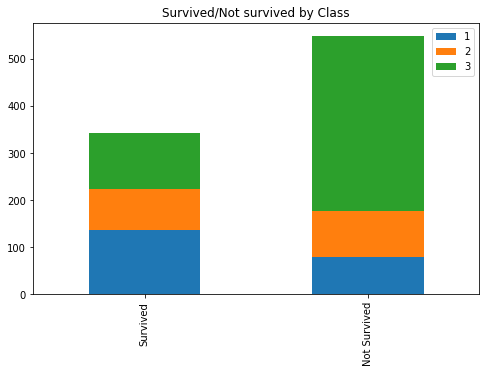

In [151]:
# # Counting the survived according to passenger class and storing 
# the value in their respective variable
survived = train[train['Survived']==1]['Pclass'].value_counts()
not_survived = train[train['Survived']==0]['Pclass'].value_counts()
# Making a dataframe with below variables
df_class = pd.DataFrame([survived, not_survived])
# Making their index
df_class.index = ['Survived', 'Not Survived']
# Making a bar graph based on Survived and not survived by passengers class
df_class.plot(kind='bar', stacked=True, figsize=(8, 5),title="Survived/Not survived by Class")
survived.sum()
print("Total survivers: {}, first: {}, second: {}, third: {}".format(survived.sum(), survived[1], survived[2], survived[3]))
print("Total survivers: {}, first: {}, second: {}, third: {}".format(not_survived.sum(), not_survived[1], not_survived[2], not_survived[3]))
display(df_class)

### 3. Implement SVM method using scikit-learn library and report the accuracy (with confusion matrix)

#### (6. Report the confusion_matrix for all the algorithms (SVM, Naïve Bayes, KNN))

In [152]:
# before implementing methods, clean our test and train data
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [153]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [154]:
# removing name, ticket, and cabin columns from both dataset
for ds in full_dataset:
  ds.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [155]:
# We observed there are 2 null values in embarked column, so we filled them with 'S'
for ds in full_dataset:
  ds['Embarked'] = ds['Embarked'].fillna('S')

In [156]:
for ds in full_dataset:
  #covnvert female and male values to 0 and 1
  ds['Sex'] = ds['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
  #convert embarked values from S, C, Q to 0, 1, 2
  ds['Embarked'] = ds['Embarked'].map({'S':0, 'C': 1, 'Q': 2}).astype(int)
  #we check the fare and set a value according to the amount of the fare
  ds.loc[ ds['Fare'] <= 10, 'Fare'] = 1
  ds.loc[ (ds['Fare'] <= 20) & (ds['Fare'] > 10), 'Fare'] = 2
  ds.loc[ (ds['Fare'] <= 30) & (ds['Fare'] > 20), 'Fare'] = 3
  ds.loc[ (ds['Fare'] <= 40) & (ds['Fare'] > 30), 'Fare'] = 4
  ds.loc[ (ds['Fare'] <= 50) & (ds['Fare'] > 40), 'Fare'] = 5
  ds.loc[ (ds['Fare'] > 50), 'Fare'] = 6
  # setting fare to int type
  ds['Fare'] = ds['Fare'].astype(int)
#we dropped those 3 columns
drops = ['SibSp','Parch','Age']
#then we dropped the column from the train and test df
train = train.drop(drops, axis = 1)
test = test.drop(drops, axis = 1)  

In [157]:
train

,PassengerId,Survived,Pclass,Sex,Fare,Embarked
0,1,0,3,1,1,0
1,2,1,1,0,6,1
2,3,1,3,0,1,0
3,4,1,1,0,6,0
4,5,0,3,1,1,0
...,...,...,...,...,...,...
886,887,0,2,1,2,0
887,888,1,1,0,3,0
888,889,0,3,0,3,0
889,890,1,1,1,3,1


In [158]:
# importing the libraries used for SVM method
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [159]:
# creating X_train from train df without survived
X_train = train.drop('Survived', axis=1)
#Y_train with only survived column
Y_train = train['Survived']
#X_test has test df without passengerId
X_test = test.drop('PassengerId', axis=1).copy()

In [160]:
# using SVC and calculating accuracy
svc = SVC()
#Fit X_train on Y_train
svc.fit(X_train, Y_train)
#Predict accuracy
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

61.62

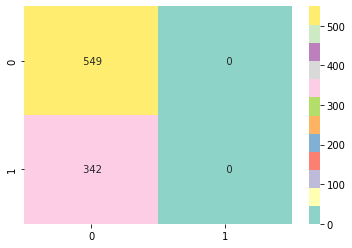

In [161]:
# SVM confision matrix
cmat = confusion_matrix(Y_train, Y_pred)
cmat
sns.heatmap(cmat, cmap='Set3', annot=True, fmt = '4.0f')

### 4. Implement the multiple types of Naïve Bayes methods using scikit-learn library and report the accuracies (with confusion matrix)

In [162]:
# importing gaussian NB
# using GaussianNB method and calculating accuracy]
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
#Fit X_train on Y_train
gaussian.fit(X_train, Y_train)
#Predict accuracy
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train)*100, 2)
acc_gaussian

76.43

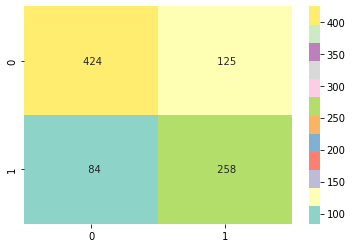

In [163]:
# Gaussian confision matrix
cmat = confusion_matrix(Y_train, Y_pred)
cmat
sns.heatmap(cmat, cmap='Set3', annot=True, fmt = '4.0f')

In [164]:
#bernoulli NB
from sklearn.naive_bayes import BernoulliNB
bernoulli = BernoulliNB()
#Fit X_train with Y_train
bernoulli.fit(X_train, Y_train)
# predict accuracy
Y_pred = bernoulli.predict(X_test)
acc_bernoulli = round(bernoulli.score(X_train, Y_train)*100, 2)
acc_bernoulli

78.68

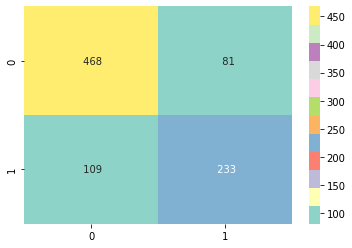

In [165]:
# Bernoulli confusion matrix
cmat = confusion_matrix(Y_train, Y_pred)
cmat
sns.heatmap(cmat, cmap='Set3', annot=True, fmt = '4.0f')

In [166]:
#multinomial NB
from sklearn.naive_bayes import MultinomialNB
multinomial = MultinomialNB()
#Fit X_train on Y_train
multinomial.fit(X_train, Y_train)
#Predict accuracy
Y_pred = multinomial.predict(X_test)
acc_multinomial = round(multinomial.score(X_train, Y_train)*100, 2)
acc_multinomial

71.83

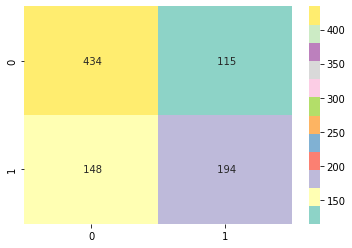

In [167]:
# Multinomial confusion matrix
cmat = confusion_matrix(Y_train, Y_pred)
cmat
sns.heatmap(cmat, cmap='Set3', annot=True, fmt = '4.0f')


### 5. Implement KNN method using scikit-learn library and report the accuracy (with confusion matrix)

In [168]:
# importing KNN classifier library
from sklearn.neighbors import KNeighborsClassifier
#Initializing number of neighbors to be used as 5
knn = KNeighborsClassifier(n_neighbors=5)
#Fit X_train on Y_train
knn.fit(X_train, Y_train)
#Predict accuracy
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

72.95

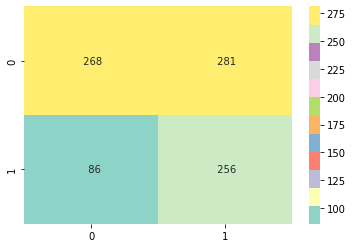

In [169]:
# KNN confusion matrix
cmat = confusion_matrix(Y_train, Y_pred)
cmat
sns.heatmap(cmat, cmap='Set3', annot=True, fmt = '4.0f')
